# Solid Waste Analysis
## Question

It is important for the City of Baltimore to provide services equitably to residents. A key performance indicator (KPI) of many city services is on time completion (completing work before the due date). Solid Waste would like to assess the performance of their services (SR Type), specifically Cleaning, Boarding, High Grass and Weeds (HGW), Dirty Streets, and Dirty Alleys. 


In [2]:
#Import Dependencies
import pandas as pd
import numpy as np 
import matplotlib as plt
from IPython.display import display, HTML

#This originally imported the Excel doc and saved it off as a pickle file for quick access.
"""import pandas as pd 
original_recs = pd.read_excel
(r'311_CSR_SW.xlsx')
original_recs.to_pickle('311_CSR_SW.pkl')
original_recs.head()"""

#Functions to init
def graph_hoods_by_overdue(df, name, sort_type='overdue'):
    overdue_by_hood = group_hoods(df)
    if sort_type == 'overdue':
        sorted_overdue = sort_by_overdue(overdue_by_hood)
        g = graph_hoods(sorted_overdue, name,"num","Neighborhoods, Ranked by % Overdue")
    elif sort_type == 'crime':
        sorted_overdue = sort_by_crime(overdue_by_hood)
        g = graph_hoods(sorted_overdue, name,"Crime Total","Neighborhoods, Ranked by Crime Total")
    return g

def group_hoods(df):
    neighborhood_groups = df.groupby("Neighborhood")
    overdue_by_hood = neighborhood_groups["Overdue"].apply(lambda x : x.sum()/len(x)).reset_index(name="Percent Overdue")
    overdue_count = neighborhood_groups["Overdue"].apply(lambda x: len(x)).reset_index(name = "Total")
    overdue_by_hood["Total Requests"] = overdue_count["Total"]
    return overdue_by_hood
    
def sort_by_overdue(df):
    sorted_overdue = df.sort_values(by="Percent Overdue")
    sorted_overdue["num"] = np.arange(0,len(df))
    sorted_overdue.drop(sorted_overdue.loc[sorted_overdue["Total Requests"]<36].index,inplace=True)
    return sorted_overdue

def sort_by_crime(df):
    crime_by_hood = pd.read_pickle(r'neighborhood_crime_data.pkl')
    df['Crime Total'] = df['Neighborhood'].apply(lambda x : crime_by_hood.loc[crime_by_hood['Neighborhood']==x]['Crime Total'])
    df.sort_values(by=['Crime Total'], inplace=True)
    df.drop(df.loc[df['Total Requests']<36].index, inplace=True)
    return df

def graph_hoods(df, name, xvalues, xlabel, ):
    g = df.plot(y="Percent Overdue", c="Total Requests", x=xvalues, kind="scatter", colormap='viridis', title=name, figsize= (5,4))
    g.set_xlabel(xlabel, fontsize=12)
    return g


## Initialize Clean Records Dataframe
"Please ignore any services labeled as “proactive”, or status noted as duplicate. Using the dataset “311_CSR” provided and filtering to only include work created from January 1, 2017- December 31, 2019." 

In [7]:
original_recs = pd.read_pickle(r"311_CSR_SW.pkl")

non_proactive_recs = original_recs.loc[original_recs["SR Type"].str.contains('Proactive')==False]
non_duplicate_recs = non_proactive_recs.loc[non_proactive_recs["SR Status"].str.contains('Duplicate')==False]

clean_recs = non_duplicate_recs[(non_duplicate_recs['Created Date'] > '2017-01-01 00:00:01') & (non_duplicate_recs['Created Date'] < '2019-12-31 23:59:59')]

clean_recs['Neighborhood'] = clean_recs['Neighborhood'].str.lower()

neighborhoods = clean_recs.groupby('Neighborhood').count()
neighborhoods['Neighborhood'] = neighborhoods.index

print(len(clean_recs))
clean_recs['geo_sw_quad'].isnull().sum()



241647


18256

## Import recent crime data from BPD
Link neighborhoods as key for data.

In [7]:
"""crime_data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
crime_by_hood = crime_data.groupby('Neighborhood')
crime_by_hood = crime_by_hood.apply(lambda x : len(x)).reset_index(name='Crime Total')
crime_by_hood['Neighborhood']= crime_by_hood['Neighborhood'].str.lower()

def fix_hoods(x):
    match_hoods_dict = {
        'beechfield,westgate' : 'beechfield',
        'hopkins bayview' : 'bayview',
        'baltimore-linwood' : 'highlandtown',
        'care' : 'middle east',
        'chinquapin park-belvedere' : 'chinquapin park',
        'dundalk marine terminal':'saint helena',
        'edgewood' : 'allendale',
        'hamilton hills' : 'westfield',
        'christopher' : 'westfield',
        'glenham-belford':'glenham-belhar',
        'old goucher' : 'barclay',
        'sbic' : 'federal hill',
        'washington village' : 'washington village/pigtown',
        'wilhelm park' : 'morrell park',
        'woodring' : 'westfield',
        'wrenlane' : 'wilson park',
        'york-homeland' : 'woodbourne-mccabe'}
    #hoods_to_fix = ['bayview','baltimore-linwood','care', 'christopher','dundalk marine terminal','edgewood','glen''hamilton hills','old goucher','wilhelm park' 'wrenlane', 'york-homeland']
    if x in match_hoods_dict.keys():
        return match_hoods_dict[x]
    else:
        return x

clean_neighborhoods = []
for hood in crime_by_hood['Neighborhood']:
    matched = fix_hoods(hood)
    if matched == 'beechfield,westgate':
        print('boo')
    search = neighborhoods['Neighborhood'].loc[neighborhoods['Neighborhood'].str.contains(matched[:4])]
    if len(neighborhoods['Neighborhood'].loc[neighborhoods['Neighborhood']==matched]) == 1:
        clean_neighborhoods.append(matched)
    elif len(search) == 1:
        clean_neighborhoods.append(matched)
    elif len(search) < 1:
        input("No match for "+ matched)
    elif len(search) > 1:
        a =input(matched + " matches: " + ', '.join(search.tolist()) +' What do you want to use?')

crime_by_hood['Neighborhood'] = pd.Series(clean_neighborhoods)
grouped = crime_by_hood.groupby('Neighborhood')
crime_by_hood = grouped.sum()
crime_by_hood['Neighborhood']=crime_by_hood.index
display(crime_by_hood.loc[crime_by_hood['Neighborhood'].str[0]=='b'])
display(crime_by_hood)
crime_by_hood.to_pickle('neighborhood_crime_data.pkl')"""
"skip"

'skip'

### Question 1
How many of each type of service requests were created each year from 2017-2019?


In [9]:
service_groups = clean_recs.groupby(['SR Type'])
service_groups.size()

SR Type
SW-Boarding        24477
SW-Cleaning        37157
SW-Dirty Alley     72318
SW-Dirty Street    44723
SW-HGW             62972
dtype: int64

### Question 2
How did % overdue change overtime?

In [11]:
overdue_recs = clean_recs.loc[clean_recs["Due Date"] < clean_recs["Close Date"]]
len(overdue_recs)

88068

### Question 3
How did % overdue change overtime?

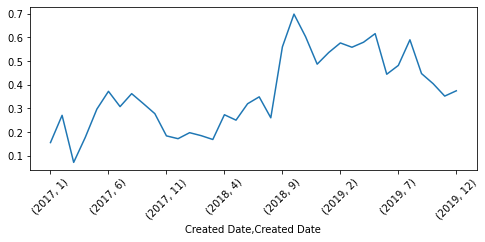

In [13]:
recs_and_overdue = clean_recs
recs_and_overdue["Overdue"] = (clean_recs["Due Date"] - clean_recs["Close Date"]) < pd.Timedelta(0)
by_complete_date_group = recs_and_overdue.groupby([recs_and_overdue["Created Date"].dt.year,recs_and_overdue["Created Date"].dt.month])

overdue_percent = by_complete_date_group["Overdue"].apply(lambda x : x.sum()/len(x))
overdue_percent.plot(kind="line", rot=45, figsize=(8,3))


### Question 4
Using the information calculated above and other information from the dataset, can you provide evidence to determine if service requests created in 2019 are being completed equitably across the city? 

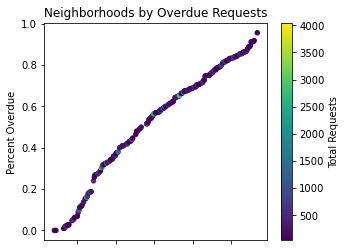

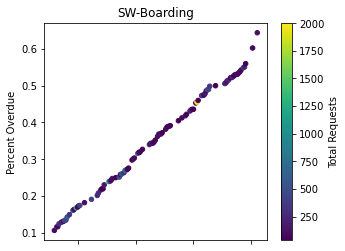

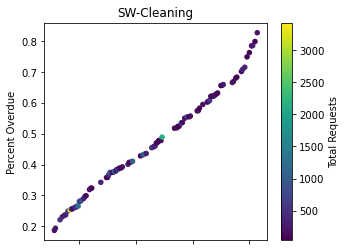

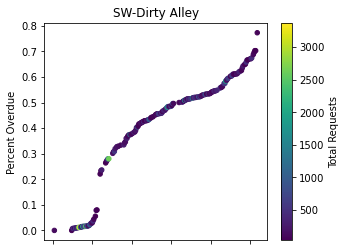

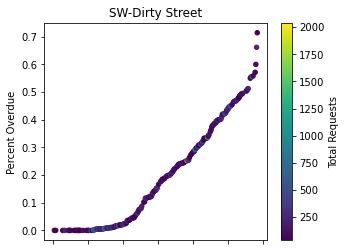

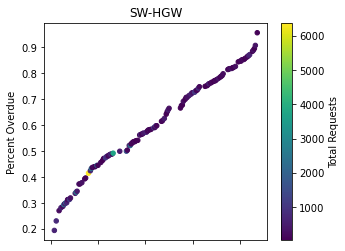

In [15]:
graph_hoods_by_overdue(clean_recs.loc[clean_recs["Created Date"].dt.year == 2019], "Neighborhoods by Overdue Requests")


for group in service_groups:
    graph_hoods_by_overdue(group[1],group[0])

### Question 5
You may also provide any additional insights that you found while exploring the data.

In [17]:
#on hold for now
"""
def sort_by_crime(df):
    crime_by_hood = pd.read_pickle(r'neighborhood_crime_data.pkl')
    hoods = []
    fix_dict = {}
    for x in df['Neighborhood']:
        print(x)
        print(crime_by_hood['Crime Total'].loc[crime_by_hood['Neighborhood']==x])
        if len(crime_by_hood['Crime Total'].loc[crime_by_hood['Neighborhood']==x]) == 1:
            hoods.append(crime_by_hood['Crime Total'].loc[crime_by_hood['Neighborhood']==x].item())
        else:
            no_loc = True
            while no_loc:
                a = crime_by_hood['Neighborhood'].loc[crime_by_hood['Neighborhood'].str.contains(x[:4])].tolist()
                b = input("Can't find a crime stat for "+ x + " Should I use " + ', '.join(a))
                print(len(crime_by_hood['Crime Total'].loc[crime_by_hood['Neighborhood']==b]))
                if len(crime_by_hood['Crime Total'].loc[crime_by_hood['Neighborhood']==b])==1:
                    hoods.append(crime_by_hood['Crime Total'].loc[crime_by_hood['Neighborhood']==b].item())
                    no_loc = False
            fix_dict[x] = b
    print(fix_dict)
    print(hoods)
    df['Crime Total'] = pd.Series(hoods)
    df.sort_values(by=['Crime Total'], inplace=True)
    df.drop(df.loc[df['Total Requests']<36].index, inplace=True)
    return df

graph_hoods_by_overdue(clean_recs.loc[clean_recs["Created Date"].dt.year == 2019], "Neighborhoods by Overdue Requests", sort_type='crime')"""
"skip"

'skip'

In [19]:
"""import requests
def get_neighborhood_fips(df):
    mean_lat = df['Latitude'].mean()
    mean_lon = df['Longitude'].mean()
    query = "https://geo.fcc.gov/api/census/block/find?latitude={}&longitude={}&showall=false&format=json".format(mean_lat,mean_lon)
    hood_resp = requests.get(query).json()['Block']['FIPS']
    return hood_resp
def group_crime(df):
    fips = get_neighborhood_fips(df)
    crimes_total = len(df)
    return pd.Series({'FIPS': fips, 'Crime Total': crimes_total})
def group_recs(df):
    fips= get_neighborhood_fips(df)
    days_overdue = df['Due Date'] - df['Close Date']
    return pd.Series({'FIPS': fips , 'Time Overdue' : days_overdue})


crime_data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
crime_by_hood = crime_data.groupby('Neighborhood')
crime_by_fips = crime_by_hood.apply(group_crime)
recs_by_hood = clean_recs.groupby('Neighborhood')
recs_by_fips = recs_by_hood.apply(group_recs)"""
"skip"



'skip'

In [38]:

#recs_by_fips_fixed.to_pickle('Average Overdue by Hood with FIPS.pkl')
#crime_by_fips_fixed = crime_by_fips 
#crime_by_fips_fixed.to_pickle('Crime Count by Hood with FIPS.pkl')

crime_by_fips = pd.read_pickle("Crime Count by Hood with FIPS.pkl")
overdue_by_fips = pd.read_pickle("Average Overdue by Hood with FIPS.pkl")
overdue_by_fips['Time Overdue'] = overdue_by_fips['Time Overdue'].apply(lambda x : x.days)

crime_by_fips = crime_by_fips.groupby('FIPS').sum()
overdue_by_fips = overdue_by_fips.groupby('FIPS')['Time Overdue'].mean()
crime_count = []
missing_fips = []

for area in overdue_by_fips.index:
    if area in crime_by_fips.index:
        crime_count.append(crime_by_fips['Crime Total'].loc[crime_by_fips.index == area])
    else:
        crime_count.append(0)
        missing_fips.append(area)
overdue_by_fips['Crime Total'] = pd.Series(crime_count)
display(overdue_by_fips['Crime Total'].sort())
print(len(missing_fips))

AttributeError: 'Series' object has no attribute 'sort'

In [51]:
sw_requests = clean_recs.copy()
bpd_requests = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
def find_greatest_least(column):
    col = column.copy()
    col = col[col!=0]
    col.dropna(inplace=True)
    col.sort_values(inplace=True)
    return (col.iloc[-1], col.iloc[0])

sw_requests = sw_requests[sw_requests['Latitude'] > 39]
bpd_requests = bpd_requests[bpd_requests['Latitude'] > 39]
sw_big_lat,sw_small_lat = find_greatest_least(sw_requests['Latitude'])
sw_big_lon,sw_small_lon = find_greatest_least(sw_requests['Longitude'])



big_lon = sw_big_lon
big_lat= sw_big_lat
small_lon = sw_small_lon
small_lat = sw_small_lat

print('big_lon', big_lon) 
print('big_lat', big_lat)
print('small_lon', small_lon) 
print('small_lat',small_lat)

def assign_grid(row):
    big_lon = -76.383227630473
    big_lat =39.661331582378004
    small_lon= -77.0
    small_lat =39.0
    grid_size = (20,30)
    x_size = (big_lon - small_lon)/grid_size[0]
    y_size = (big_lat - small_lat)/grid_size[1]
    lat = row['Latitude']
    lon = row['Longitude']
    x_loc = floor((lon - small_lon)/x_size)
    y_loc = floor((lat - small_lat)/y_size)




big_lon -76.406988
big_lat 39.621921
small_lon -76.815692
small_lat 39.2004413570053


In [55]:
import math
def assign_grid(row):
    big_lon = -76.406988
    big_lat =39.621921
    small_lon= -76.815692
    small_lat = 39.2004413570053
    grid_size = (20,30)
    x_size = (big_lon - small_lon)/grid_size[0]
    y_size = (big_lat - small_lat)/grid_size[1]
    lat = row['Latitude']
    lon = row['Longitude']
    x_loc = math.floor((lon - small_lon)/x_size)
    y_loc = math.floor((lat - small_lat)/y_size)
    return(pd.Series({"X Location": x_loc, "Y Location": y_loc}))

test = clean_recs.dropna()
test[['X Location', 'Y Location']] = test.apply(assign_grid, axis = 1)


,Service Request Number,SR Type,Agency,Created Date,SR Status,Due Date,Close Date,Street Address,Neighborhood,Latitude,Longitude,geo_sw_quad,X Location,Y Location


In [65]:
test = test[test['Latitude']>39]
#test.groupby(by=['X Location','Y Location']).count()['Service Request Number']
test.sort_values('Longitude')



,Service Request Number,SR Type,Agency,Created Date,SR Status,Due Date,Close Date,Street Address,Neighborhood,Latitude,Longitude,geo_sw_quad,X Location,Y Location
227725,18-00315879,SW-Dirty Alley,Solid Waste ...,2018-05-01 14:56:16,Closed,2018-05-08 14:56:16,2018-05-09 12:14:36,"4144 FALLSTAFF RD, Baltimore City, 21215",fallstaff,39.361327,-76.711277,NORTHWEST,5,11
231775,18-00341135,SW-Dirty Alley,Solid Waste ...,2018-05-10 15:00:43,Closed,2018-05-17 15:00:43,2018-05-16 09:31:43,"4144 FALLSTAFF RD, Baltimore City, 21215",fallstaff,39.361327,-76.711277,NORTHWEST,5,11
349399,19-00398429,SW-Dirty Street,Solid Waste ...,2019-07-14 22:44:20,Closed,2019-07-23 22:44:19,2019-08-06 17:50:40,"4301 LABYRINTH RD, Baltimore City, 21215",reisterstown station,39.356370,-76.711250,NORTHWEST,5,11
262198,18-00543287,SW-Dirty Street,Solid Waste ...,2018-07-26 21:20:03,Closed,2018-08-02 21:20:03,2018-08-02 14:08:56,"4132 FALLSTAFF RD, Baltimore City, 21215",fallstaff,39.361395,-76.711249,NORTHWEST,5,11
140031,17-00416339,SW-Dirty Alley,Solid Waste ...,2017-07-12 10:26:06,Closed,2017-07-19 10:26:06,2017-07-13 18:58:06,"POWDER MILL LN & WAYNE AVE, Baltimore City, 21207",howard park,39.331634,-76.711204,NORTHWEST,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376798,19-00723111,SW-Dirty Alley,Solid Waste ...,2019-10-25 14:23:30,Closed,2019-11-05 13:23:30,2019-10-28 15:12:49,"6834 BOSTON AVE, Baltimore City, 21222",graceland park,39.281004,-76.529801,SOUTHEAST,13,5
311134,19-00106570,SW-Dirty Street,Solid Waste ...,2019-02-25 14:09:21,Closed,2019-03-06 14:09:21,2019-02-26 15:11:37,"BELAIR RD & FLEETWOOD AVE, Baltimore City, 21206",overlea,39.355566,-76.529797,NORTHEAST,13,11
383122,19-00857664,SW-Dirty Alley,Solid Waste ...,2019-12-05 17:47:22,Closed,2019-12-16 17:47:22,2019-12-06 16:02:01,"1245 DELBERT AVE, Baltimore City, 21222",graceland park,39.282027,-76.529793,SOUTHEAST,13,5
340521,19-00323998,SW-Dirty Street,Solid Waste ...,2019-06-12 08:54:13,Closed,2019-06-21 08:54:12,2019-06-17 15:00:26,"BELAIR RD & FLEETWOOD AVE, Baltimore City, 21206",overlea,39.355568,-76.529792,NORTHEAST,13,11
